In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import io as sio
dpi = 96
scale = 0.1

In [6]:
try:
    image_in = cv.imread("data/hassaan-here-bSgg04FwCXY-unsplash.jpg")
    (h, w, d) = image_in.shape
except Exception:
    print("Err")
type(image_in), image_in.shape, image_in.dtype

(numpy.ndarray, (4000, 6000, 3), dtype('uint8'))

In [7]:
image_in = cv.cvtColor(image_in, cv.COLOR_BGR2RGB)

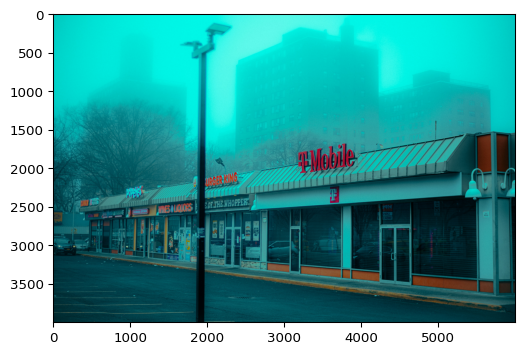

In [8]:
fig, axs = plt.subplots(figsize=(w*scale/dpi, h*scale/dpi), dpi=dpi)
plt.imshow(image_in)

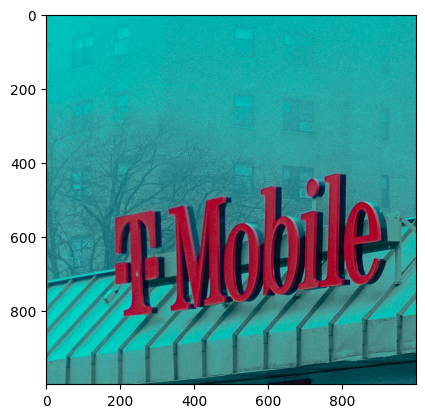

In [9]:
image_roi = image_in[1250:2250,3000:4000]
(wr,hr) = image_roi.shape[:2]
scale_roi = 1.5
plt.imshow(image_roi)

In [10]:
#Гамма коррекция
def gammaCorrection(image, gamma):
    new_image = image.copy()
    (h, w) = new_image.shape[:2]
    for i in range(w):
        for j in range(h):
            for component in range(3):
                corrected_component = 255 * (new_image.item(i, j, component) / 255) ** (1 / gamma)
                new_image.itemset((i, j, component), corrected_component)
    return new_image

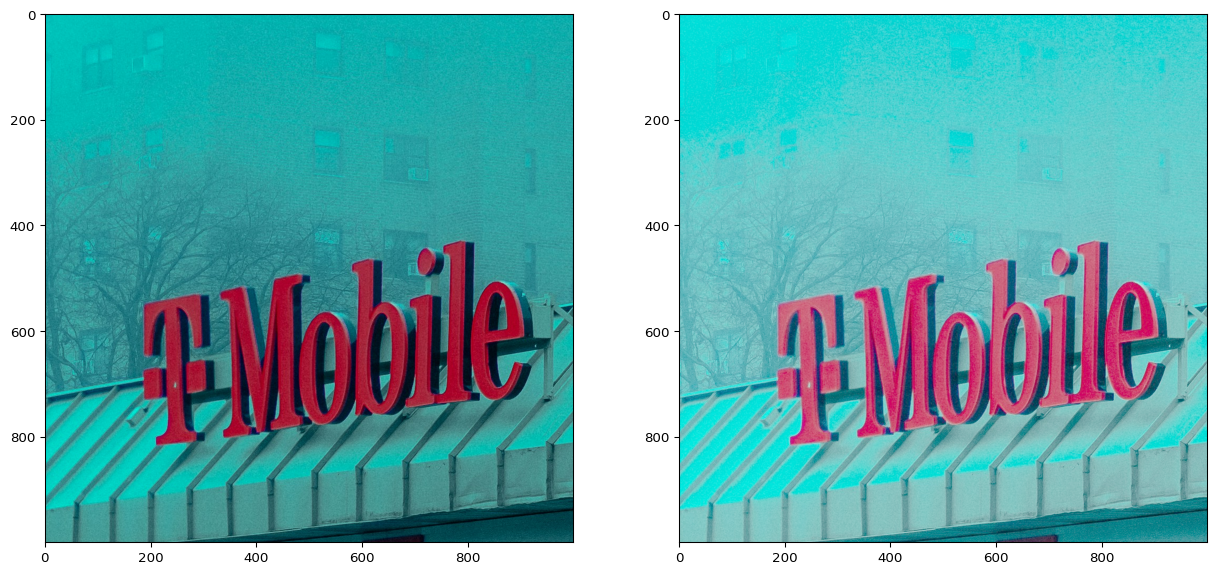

In [11]:

image_roi_corrected = gammaCorrection(image_roi, 2)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_corrected)

In [12]:
#Контрастирование
def contrasting(image, alpha, beta):
    new_image = image.copy()
    (h, w) = new_image.shape[:2]
    for i in range(w):
        for j in range(h):
            for component in range(3):
                corrected_component = alpha * (new_image.item(i, j, component) - 128) + 128 + beta
                new_image.itemset((i, j, component),  corrected_component)
    return new_image

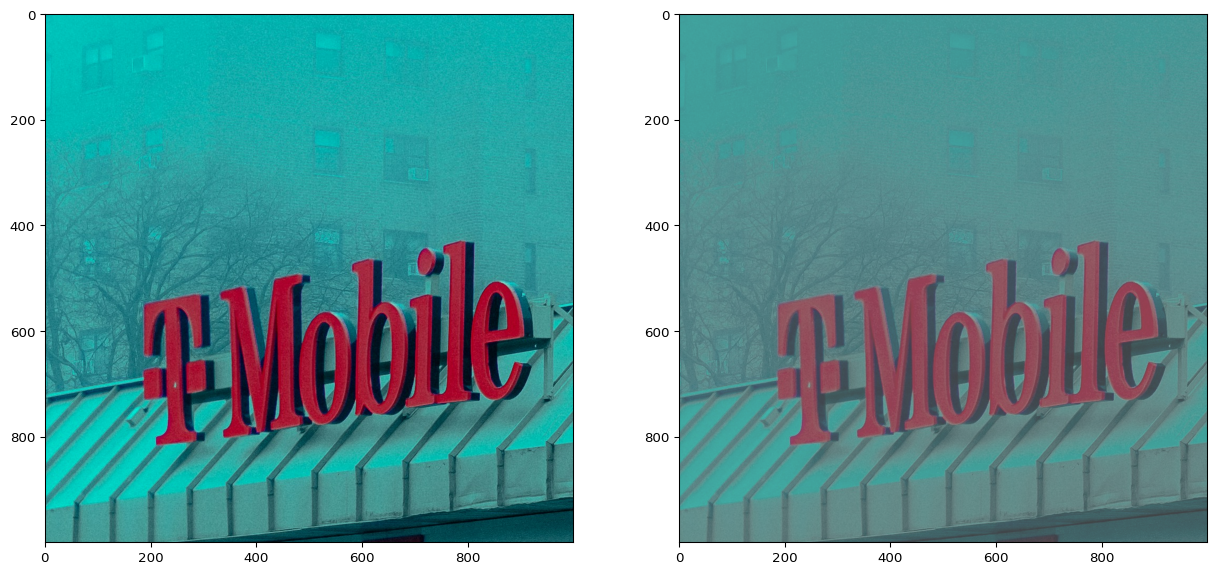

In [13]:
image_roi_contrasted = contrasting(image_roi, 0.5, 0.1)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_contrasted)

In [14]:
#Пороговая обработка
def thresholding(image, threshold):
    new_image = image.copy()
    (h, w) = new_image.shape[:2]
    for i in range(w):
        for j in range(h):
            median = 0
            for component in range(3):
                median += new_image.item(i, j, component)
            median = median/3
            for component in range(3):
                new_image.itemset((i, j, component),  255 if median > threshold else 0)
    return new_image

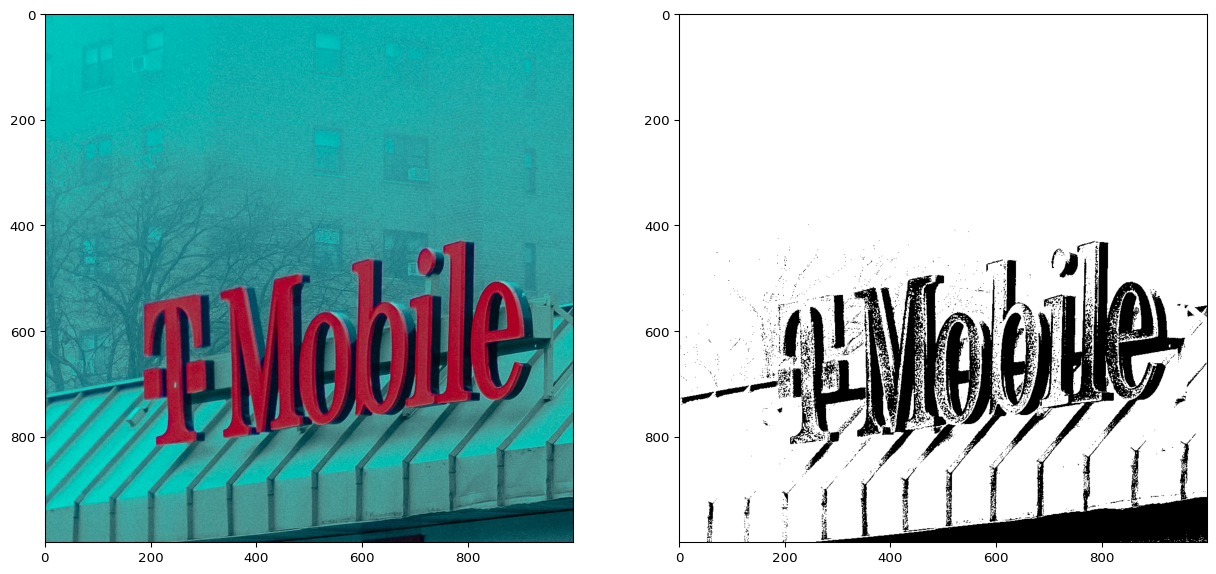

In [15]:
image_roi_thresholded = thresholding(image_roi, 80)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_thresholded)

In [16]:
#Наложение изображений
def blend(image1, alpha, image2, beta):
    (h1, w1) = image1.shape[:2]
    (h2, w2) = image2.shape[:2]
    min_h = min(h1,h2)
    min_w = min(w1,w2)
    image_out = np.zeros((min_h, min_w , 3), np.uint8)
    for i in range(min_w):
        for j in range(min_h):
            for component in range(3):
                blended_component = alpha * image1.item(i, j, component) + beta * image2.item(i, j, component)
                image_out.itemset((i, j, component),  blended_component)
    return image_out

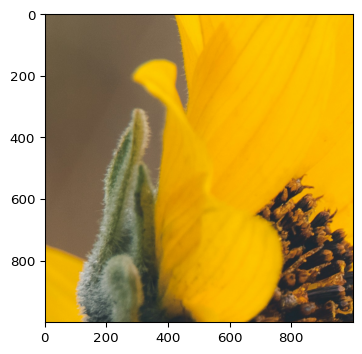

In [20]:
try:
    image1_in = cv.imread("data/eric-muhr-wnIiJHri9YQ-unsplash.jpg")
except Exception:
    print("Err")

image1_in = cv.cvtColor(image1_in, cv.COLOR_BGR2RGB)
image1_roi = image1_in[1500:2500,3000:4000]
fig, axs = plt.subplots(figsize=(w*scale/dpi, h*scale/dpi), dpi=dpi)
plt.imshow(image1_roi)


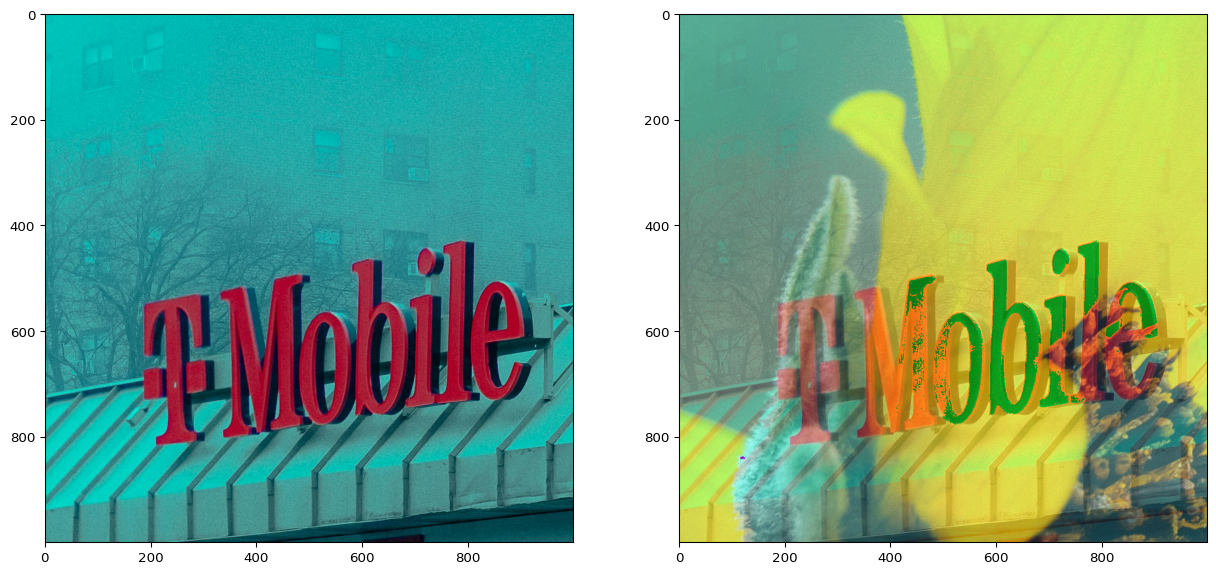

In [22]:
image_roi_blended = blend(image_roi, 0.5, image1_roi, 0.75)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_blended)